In [2]:
# project from numerical analysis
# image compression of a grayscale image using the SVD

from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img1 = Image.open("marilyn.png")
img2 = ImageOps.grayscale(img1)
A = np.array(img2, dtype = np.float64)

for i in range(len(A)):
    for j in range(len(A[i])):
        A[i, j] = A[i, j] / 255


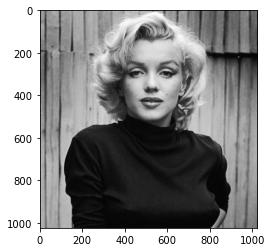

In [5]:
# original image we wish to compress

plt.imshow(A, cmap='gray')

In [10]:
U, S_arr, VH = np.linalg.svd(A)

# method to turn the array of singular values into the corresponding matrix

def singular_value_matrix(S_arr):   
    S = np.zeros((len(S_arr), len(S_arr)))
    num_rows, num_cols = S.shape
    for i in range(0, num_rows):
        for j in range(0, len(S[i])):
            if (i == j):
                S[i, j] = S_arr[i]
    return S

S = singular_value_matrix(S_arr)


In [11]:
def truncated_svd(U, S, VH, k):
    svd_list = []
    num_rows, num_cols = U.shape
    U_k = np.zeros((num_rows, k)) 
    for i in range(0, num_rows):
        for j in range(0, len(U_k[i])):
            U_k[i, j] = U[i, j]

    S_k = np.zeros((k, k))
    for i in range(0, k):
        for j in range(0, len(S_k[i])):
            S_k[i, j] = S[i, j]
    
    V = VH.T
    num_rows, num_cols = V.shape
    V_k = np.zeros((num_rows, k)) 
    for i in range(0, num_rows):
        for j in range(0, len(V_k[i])):
            V_k[i, j] = V[i, j]
    VH_k = V_k.T
    svd_list.append(U_k)
    svd_list.append(S_k)
    svd_list.append(VH_k)

    A_k = U_k.dot(S_k).dot(VH_k)
    return A_k, svd_list

def get_size(svd_list):
    size = 0
    for matrix in svd_list:
        size = size + matrix.nbytes
    return size


In [12]:
# some test values for A_k

A_1, A_1_svd_list = truncated_svd(U, S, VH, 1)
A_2, A_2_svd_list = truncated_svd(U, S, VH, 2)
A_4, A_4_svd_list = truncated_svd(U, S, VH, 4)
A_6, A_6_svd_list = truncated_svd(U, S, VH, 6)
A_8, A_8_svd_list = truncated_svd(U, S, VH, 8)

# k = 150 leads to a pretty good approximation

A_150, A_150list = truncated_svd(U, S, VH, 150)


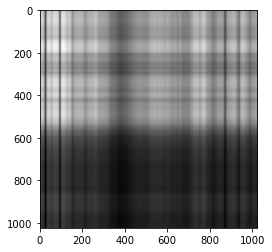

In [864]:
plt.imshow(A_1, cmap='gray')

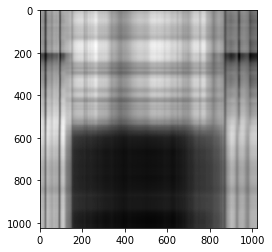

In [865]:
plt.imshow(A_2, cmap='gray')

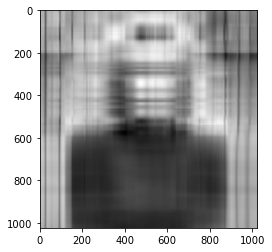

In [866]:
plt.imshow(A_4, cmap='gray')

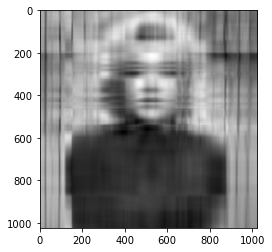

In [867]:
plt.imshow(A_6, cmap='gray')

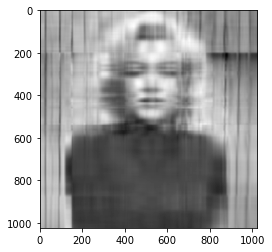

In [868]:
plt.imshow(A_8, cmap='gray')

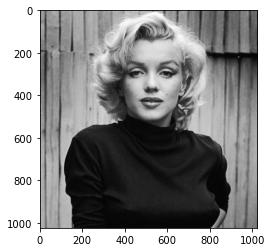

In [869]:
# original picture

plt.imshow(A, cmap='gray')

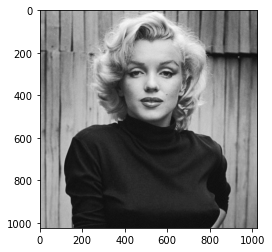

In [13]:
# approximation with truncation size of 150 x 150

plt.imshow(A_150, cmap='gray')

Average error: 0.011392445395943869
Maximum error: 0.16158552783879943


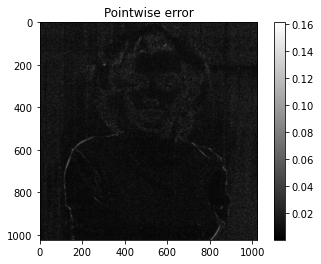

In [871]:
# method that takes two matrices and returns the pointwise error matrix between them

def pointwise_error(A, A_k):
    num_rows, num_cols = A.shape
    
    # error matrix E
    
    E = np.zeros((num_rows, num_cols))
    for i in range(0, num_rows):
        for j in range(0, len(E[i])):
            E[i, j] = abs(A[i, j] - A_k[i, j])
    
    return E

# method that returns the average error of a given error matrix

def average_error(E):
    sum = 0
    num_rows, num_cols = E.shape

    for i in range(0, num_rows):
        for j in range(0, len(E[i])):
            sum = sum + E[i, j]

    avg = sum / (num_rows * num_cols)
    return avg

# method that returns the maximum error of a given error matrix

def maximum_error(E):
    max = E[0, 0]
    num_rows, num_cols = E.shape
    for i in range(0, num_rows):
        for j in range(0, len(E[i])):
            if (E[i, j] > max):
                max = E[i, j]
    
    return max

plt.imshow(pointwise_error(A, A_150), cmap='gray')
plt.colorbar()
plt.title('Pointwise error')
print('Average error:', average_error(pointwise_error(A, A_150)))
print('Maximum error:', maximum_error(pointwise_error(A, A_150)))


In [872]:
xList = []
for i in range(1, 1025):
    xList.append(i)

# yList1 stores the error values
yList1 = []

# yList2 stores the bytes required to store U,S,VH
yList2 = []

# A_kList stores the varioius A_k matrices
A_kList = []
for k in xList:
    A_k, svd_list = truncated_svd(U, S, VH, k)
    A_kList.append(A_k)
    yList2.append(get_size(svd_list))


for A_k in A_kList:
    error = maximum_error(pointwise_error(A, A_k))
    yList1.append(error)



Text(0, 0.5, 'Error value')

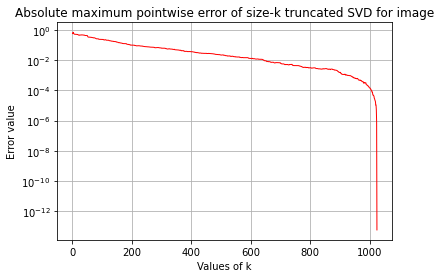

In [873]:
# plotting absolute maximum pointwise error of truncated svd vs original image

fig = plt.figure() 
plt.semilogy(xList, yList1, linewidth = 1, label = "asdf", c = "red")
plt.grid()
plt.title("Absolute maximum pointwise error of size-k truncated SVD for image")
plt.xlabel("Values of k")
plt.ylabel("Error value")

Text(0, 0.5, 'Size in bytes')

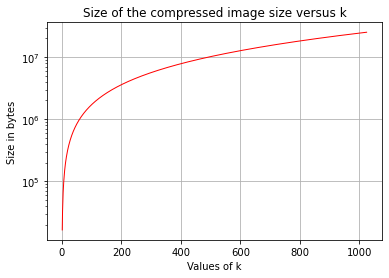

In [874]:
# plotting sizes of the compressed images

fig = plt.figure() 
plt.semilogy(xList, yList2, linewidth = 1, label = "asdf", c = "red")
plt.grid()
plt.title("Size of the compressed image size versus k")
plt.xlabel("Values of k")
plt.ylabel("Size in bytes")

In [875]:
# part two of problem 6

# method that splits a matrix A into m*m total sub matrices, and returns a list containing these sub matrices

def create_blocks(A, m):
    block_list = []

    if (len(A) % m != 0):
        return
    
    increment = len(A) / m


    for i in range(0, m):
        for j in range(0, m):
            B = A[int(i * increment): int(i * increment + increment), int(j * increment): int(j * increment + increment)]
            block_list.append(B)

    return block_list

# method that reassembles the matrices from a block_list back into a large matrix

def reassemble_matrices(block_list):
    m = len(block_list[0])

    total_elements = (m * m * len(block_list))
    n = int(np.sqrt(total_elements))
    num_block_rows = int(n / m)
    
    A = np.zeros((n, n))

    for i in range (0, num_block_rows):
        for j in range(0, num_block_rows):
            block_index = int(num_block_rows * i + j)
            A[int(i * m): int(i * m + m), int(j * m): int(j * m + m)] = block_list[block_index][0:m, 0:m]

    return A

In [876]:
# method that compresses a matrix A blockwise splitting the matrix into mxm total blocks

def compress_blockwise(A, m):

    # number of bytes required to store the svd
    size = 0
    
    # split of the matrix into the blocks
    block_list = create_blocks(A, m)
    A_k_list = []
    
    for matrix in block_list:
        # k value for truncating blocks
        k = 1
        # algorithm that finds the best value of k to approximate a block
        while (True):
            U, S_arr, VH = np.linalg.svd(matrix)
            S = singular_value_matrix(S_arr)
            A_k, A_k_svd_list = truncated_svd(U, S, VH, k)
            if (average_error(pointwise_error(matrix, A_k)) < 0.011392445395943869 or k == int(len(A) / m)):
                size = size + get_size(A_k_svd_list)
                A_k_list.append(A_k)
                break
            else:
                k = k + 1
    
    # reassemble the individual blocks for viewing
    A = reassemble_matrices(A_k_list)
    return A, size

        

size in bytes of original photo:   8388608


Text(0, 0.5, 'Size in bytes')

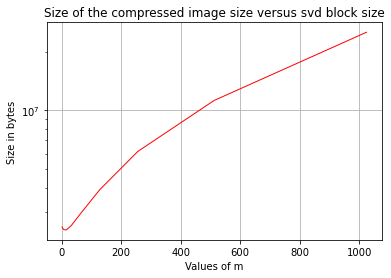

In [877]:
print('size in bytes of original photo:  ', A.nbytes)

num_blocks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
sizes = []

for m in num_blocks:
    B, size = compress_blockwise(A, m)
    sizes.append(size)

fig = plt.figure() 
plt.semilogy(num_blocks, sizes, linewidth = 1, label = "asdf", c = "red")
plt.grid()
plt.title("Size of the compressed image size versus svd block size")
plt.xlabel("Values of m")
plt.ylabel("Size in bytes")



size in bytes: 2518000


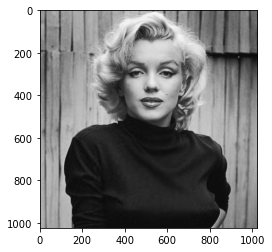

In [878]:
# using m = 2 leads to a small file but takes a while to compress using my algorithm for finding k
# it takes 69.8 seconds with m = 2

B, size = compress_blockwise(A, 2)

plt.imshow(B, cmap='gray')
print('size in bytes:', size)

size in bytes: 2950680


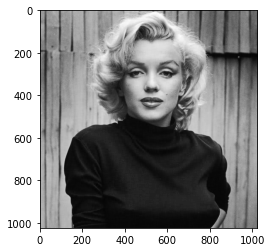

In [879]:
# using m = 64 is a happy medium for file size vs time to compress
# it takes 4.1 seconds with m = 64

B, size = compress_blockwise(A, 64)

plt.imshow(B, cmap='gray')
print('size in bytes:', size)